In [229]:
# Import some useful libraries
%matplotlib inline
import pandas as pd
import urllib
import xml.etree.ElementTree as ET
from scraper import *
import numpy as np
import scipy.sparse as sp
from tables import *
import matplotlib.pyplot as plot
%load_ext autoreload
%autoreload 2

# display all pandas columns

pd.set_option('display.max_columns', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
table = Tables()
table.interventions()

/Users/joachimmuth/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/joachimmuth/Documents/EPFL/ADA/parliament-viz/scraping/tables.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  transcripts['PersonNumber'] = transcripts['PersonNumber'].astype(int)
/Users/joachimmuth/Documents/EPFL/ADA/parliament-viz/scraping/tables.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

[INFO] JSON created in file  data/interventions.json


In [6]:
df = pd.read_csv('data/Transcript.csv')

In [19]:
def word_counter(df):
    if type(df['Text']) == float:
        return 0
    else:
        return len(df['Text'].split())

df['NumberWord'] = df.apply(word_counter, axis=1)
df.head()

,Unnamed: 0,CantonAbbreviation,CantonId,CantonName,CouncilId,CouncilName,DisplaySpeaker,End,Function,ID,IdSession,IdSubject,Language,LanguageOfText,MeetingCouncilAbbreviation,MeetingDate,MeetingVerbalixOid,Modified,ParlGroupAbbreviation,ParlGroupName,PersonNumber,SortOrder,SpeakerFirstName,SpeakerFullName,SpeakerLastName,Start,Text,Type,VoteId,NumberWord
0,0,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T14:50:21.663,NaN,1,4601,1,FR,FR,N,19991206,637,2015-11-09T11:48:16.91,C,Groupe démocrate-chrétien,498.0,3,Jacques,Neirynck Jacques,Neirynck,1999-12-06T14:36:50.007,<pd_text><p>La séance d'aujourd'hui s'ouvre so...,1,NaN,1299
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4601,1,FR,DE,N,19991206,637,2015-11-09T11:48:16.933,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,<pd_text><p>[VS]</p>\n<p><i>Musiker des Schwei...,3,NaN,36
2,2,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T14:33:39.803,NaN,3,4601,1,FR,FR,N,19991206,637,2015-11-09T11:48:16.937,C,Groupe démocrate-chrétien,498.0,1,Jacques,Neirynck Jacques,Neirynck,1999-12-06T14:32:24.303,<pd_text><p>Madame la Présidente de la Confédé...,1,NaN,39
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4601,2,FR,DE,N,19991206,637,2015-11-09T11:48:16.947,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,<pd_text><p>[VS]</p>\n<p><i>Ergebnis der Wahl ...,3,NaN,122
4,4,BE,2.0,Berne,1.0,Conseil national,True,1999-12-06T16:53:32.903,NaN,5,4601,2,FR,NaN,N,19991206,637,2015-11-09T11:48:16.947,V,Groupe de l'Union démocratique du Centre,205.0,17,Hanspeter,Seiler Hanspeter,Seiler,1999-12-06T16:50:36.637,<pd_text><p>Wir kommen zur Wahl der Stimmenzäh...,1,NaN,34


<function matplotlib.pyplot.show>

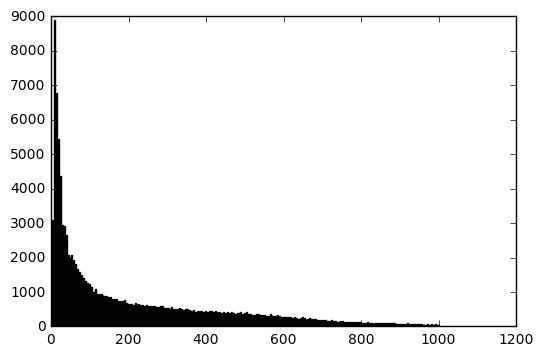

In [32]:
bins = np.linspace(0, 1000, 400)
plot.hist(df.NumberWord, bins=bins)
plot.show


(array([ 13931.,  21513.,  12053.,   9856.,   6750.,   7231.,   5471.,
          5482.,   4392.,   4282.,   3574.,   3601.,   3102.,   3154.,
          2794.,   2932.,   2504.,   2771.,   2552.]),
 array([   0.        ,   10.52631579,   21.05263158,   31.57894737,
          42.10526316,   52.63157895,   63.15789474,   73.68421053,
          84.21052632,   94.73684211,  105.26315789,  115.78947368,
         126.31578947,  136.84210526,  147.36842105,  157.89473684,
         168.42105263,  178.94736842,  189.47368421,  200.        ]),
 <a list of 19 Patch objects>)

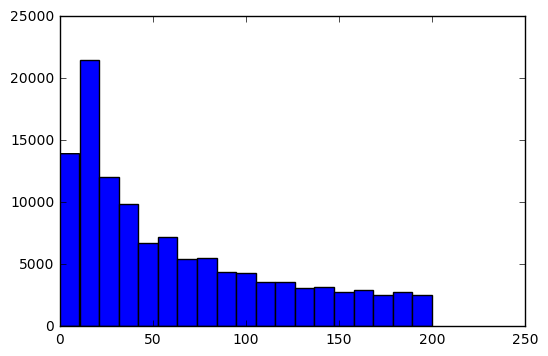

In [30]:
# zoom

bins = np.linspace(0, 200, 20)
plot.hist(df.NumberWord, bins=bins)

In [67]:
from collections import defaultdict

def get_year(df):
    return int(df.StartDate[:4])

sessions['StartYear'] = sessions.apply(get_year, axis=1)
year_dict = sessions['StartYear'].to_dict()
year_dict = defaultdict(lambda: 0, year_dict)
year_dict

defaultdict(<function __main__.<lambda>>,
            {4311: 1990,
             4312: 1990,
             4313: 1990,
             4314: 1990,
             4315: 1990,
             4316: 1991,
             4317: 1991,
             4318: 1991,
             4319: 1991,
             4320: 1991,
             4401: 1991,
             4402: 1992,
             4403: 1992,
             4404: 1992,
             4405: 1992,
             4406: 1992,
             4407: 1992,
             4408: 1993,
             4409: 1993,
             4410: 1993,
             4411: 1993,
             4412: 1993,
             4413: 1994,
             4414: 1994,
             4415: 1994,
             4416: 1994,
             4417: 1995,
             4418: 1995,
             4419: 1995,
             4420: 1995,
             4501: 1995,
             4502: 1996,
             4503: 1996,
             4504: 1996,
             4505: 1996,
             4506: 1997,
             4507: 1997,
             4508: 1997,
        

In [56]:
df.shape

(203557, 30)

In [61]:
df_long = df.loc[df.NumberWord > 30]
df_long.head(2)

,Unnamed: 0,CantonAbbreviation,CantonId,CantonName,CouncilId,CouncilName,DisplaySpeaker,End,Function,ID,IdSession,IdSubject,Language,LanguageOfText,MeetingCouncilAbbreviation,MeetingDate,MeetingVerbalixOid,Modified,ParlGroupAbbreviation,ParlGroupName,PersonNumber,SortOrder,SpeakerFirstName,SpeakerFullName,SpeakerLastName,Start,Text,Type,VoteId,NumberWord
0,0,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T14:50:21.663,NaN,1,4601,1,FR,FR,N,19991206,637,2015-11-09T11:48:16.91,C,Groupe démocrate-chrétien,498.0,3,Jacques,Neirynck Jacques,Neirynck,1999-12-06T14:36:50.007,<pd_text><p>La séance d'aujourd'hui s'ouvre so...,1,NaN,1299
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4601,1,FR,DE,N,19991206,637,2015-11-09T11:48:16.933,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,<pd_text><p>[VS]</p>\n<p><i>Musiker des Schwei...,3,NaN,36


In [68]:
def define_year(df):
    return year_dict[df['IdSession']]

df_long['year'] = df_long.apply(define_year, axis=1)

/Users/joachimmuth/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [74]:
df_long = df_long[np.isfinite(df_long['PersonNumber'])]
df_long['PersonNumber'] = df_long['PersonNumber'].astype(int)

In [75]:
df_long.head()

,Unnamed: 0,CantonAbbreviation,CantonId,CantonName,CouncilId,CouncilName,DisplaySpeaker,End,Function,ID,IdSession,IdSubject,Language,LanguageOfText,MeetingCouncilAbbreviation,MeetingDate,MeetingVerbalixOid,Modified,ParlGroupAbbreviation,ParlGroupName,PersonNumber,SortOrder,SpeakerFirstName,SpeakerFullName,SpeakerLastName,Start,Text,Type,VoteId,NumberWord,year
0,0,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T14:50:21.663,NaN,1,4601,1,FR,FR,N,19991206,637,2015-11-09T11:48:16.91,C,Groupe démocrate-chrétien,498,3,Jacques,Neirynck Jacques,Neirynck,1999-12-06T14:36:50.007,<pd_text><p>La séance d'aujourd'hui s'ouvre so...,1,NaN,1299,1999
2,2,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T14:33:39.803,NaN,3,4601,1,FR,FR,N,19991206,637,2015-11-09T11:48:16.937,C,Groupe démocrate-chrétien,498,1,Jacques,Neirynck Jacques,Neirynck,1999-12-06T14:32:24.303,<pd_text><p>Madame la Présidente de la Confédé...,1,NaN,39,1999
4,4,BE,2.0,Berne,1.0,Conseil national,True,1999-12-06T16:53:32.903,NaN,5,4601,2,FR,NaN,N,19991206,637,2015-11-09T11:48:16.947,V,Groupe de l'Union démocratique du Centre,205,17,Hanspeter,Seiler Hanspeter,Seiler,1999-12-06T16:50:36.637,<pd_text><p>Wir kommen zur Wahl der Stimmenzäh...,1,NaN,34,1999
10,10,VD,22.0,Vaud,1.0,Conseil national,True,1999-12-06T15:19:52.32,NaN,11,4601,2,FR,NaN,N,19991206,637,2015-11-09T11:48:16.95,C,Groupe démocrate-chrétien,498,2,Jacques,Neirynck Jacques,Neirynck,1999-12-06T15:19:03.867,<pd_text><p>Nous passons à l'élection du prési...,1,NaN,31,1999
11,11,GE,25.0,Genève,1.0,Conseil national,True,1999-12-06T15:23:17.337,NaN,12,4601,2,FR,FR,N,19991206,637,2015-11-09T11:48:16.95,G,Groupe écologiste,497,3,Patrice,Mugny Patrice,Mugny,1999-12-06T15:19:52.32,<pd_text><p>Il semble acquis qu'une majorité d...,1,NaN,228,1999


In [95]:
interventions = pd.DataFrame(df_long.groupby(['PersonNumber', 'year']).size().rename('Counts'))
interventions = interventions.reset_index()
interventions.head()

,PersonNumber,year,Counts
0,9,2000,15
1,9,2001,9
2,9,2002,4
3,9,2003,10
4,12,1999,4


In [132]:
median = interventions.groupby('year').agg('median')
median = median['Counts'].rename('median').astype(int)
median

year
0        1
1999     3
2000    15
2001    19
2002    21
2003    18
2004    22
2005    22
2006    21
2007    17
2008    19
2009    25
2010    22
2011    19
2012    22
2013    22
2014    23
2015    21
2016    18
Name: median, dtype: int64

In [126]:
ppl = pd.read_csv('data/Person.csv').dropna(axis=0, subset=['PersonNumber', 'PersonIdCode'])
ppl.PersonIdCode = ppl.PersonIdCode.astype(int)
ppl = ppl.set_index('PersonNumber')
active_numbers = ppl['PersonIdCode']
active_numbers.head(10)

PersonNumber
1     2200
2     2002
6     2004
7     2005
8     2008
9     2268
10    2269
11    2011
12    2335
13    2202
Name: PersonIdCode, dtype: int64

In [180]:

x = interventions.join(active_numbers, how='inner', on='PersonNumber')
x = x.join(median, how='inner', on='year')
x.head()

,PersonNumber,year,Counts,PersonIdCode,median
0,9,2000,15,2268,15
5,12,2000,107,2335,15
10,14,2000,6,2264,15
18,15,2000,21,2270,15
35,21,2000,14,2017,15


In [205]:
x.loc[x.PersonIdCode == 2023]

,PersonNumber,year,Counts,PersonIdCode,median
2471,724,2016,11,2023,18
2467,724,2009,1,2023,25
2468,724,2010,10,2023,22
2466,724,2008,19,2023,19
2469,724,2011,1,2023,19
2470,724,2015,3,2023,21


In [204]:
for i in x.loc[x.PersonIdCode == 2023].values:
    print(i)

[ 724 2016   11 2023   18]
[ 724 2009    1 2023   25]
[ 724 2010   10 2023   22]
[ 724 2008   19 2023   19]
[ 724 2011    1 2023   19]
[ 724 2015    3 2023   21]


In [220]:
x.sort_values(by='PersonIdCode', inplace=True)
persons = x.PersonIdCode.unique()

dic = {}
for person in persons:
    arr = list()
    for row in x.loc[x.PersonIdCode == person].values:
        internal_dic = {}
        internal_dic['year'] = int(row[1])
        internal_dic['int'] = int(row[2])
        internal_dic['median'] = int(row[4])
        arr.append(internal_dic)
    dic[str(person)] = arr
    
dic

{'2012': [{'int': 20, 'median': 18, 'year': 2003},
  {'int': 3, 'median': 3, 'year': 1999},
  {'int': 17, 'median': 22, 'year': 2004},
  {'int': 21, 'median': 21, 'year': 2002},
  {'int': 25, 'median': 15, 'year': 2000},
  {'int': 16, 'median': 19, 'year': 2001},
  {'int': 18, 'median': 21, 'year': 2006},
  {'int': 13, 'median': 22, 'year': 2005},
  {'int': 17, 'median': 17, 'year': 2007}],
 '2017': [{'int': 245, 'median': 21, 'year': 2006},
  {'int': 14, 'median': 15, 'year': 2000},
  {'int': 35, 'median': 22, 'year': 2012},
  {'int': 289, 'median': 22, 'year': 2005},
  {'int': 303, 'median': 22, 'year': 2004},
  {'int': 31, 'median': 22, 'year': 2013},
  {'int': 6, 'median': 3, 'year': 1999},
  {'int': 46, 'median': 18, 'year': 2003},
  {'int': 17, 'median': 19, 'year': 2001},
  {'int': 270, 'median': 17, 'year': 2007},
  {'int': 19, 'median': 21, 'year': 2002},
  {'int': 5, 'median': 23, 'year': 2014}],
 '2023': [{'int': 11, 'median': 18, 'year': 2016},
  {'int': 1, 'median': 25, 'y

In [221]:
import json
with open('data/test.json', 'w') as fp:
    json.dump(dic, fp)

# Tables used for D3 visualisation 
Tables:
* author
* cosigner
* interest

In [2]:
tables = Tables()

/home/gael/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
interest = tables.interest()
interest.head()

TagName,MemberCouncilNumber,Politique d‘Etat,Politique internationale,Politique de sécurité,Politique européenne,Droit,Économie,Finances,Questions sociales,Éducation,Médias et communication,Science et recherche,Emploi et travail,Transports,Environnement,Agriculture,Énergie,Parlement,Droit civil,Droit pénal,Justice,Droit international,Droits de l'homme,Fiscalité,Politique migratoire,Culture,Protection sociale,Santé,Aménagement du territoire et logement
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,17,25,14,4,16,22,7,20,5,6,2,0,19,24,9,11,7,0,0,0,0,0,0,12,6,0,16,4
2,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,5,3,2,3,3,10,10,4,5,3,4,0,8,4,3,1,1,0,0,0,0,0,0,3,1,0,7,3
4,14,20,12,21,5,18,53,34,23,18,18,10,0,82,29,23,9,4,0,0,0,0,0,0,10,10,0,26,8


In [4]:
authors = tables.author()
authors.head()

,MemberCouncilNumber,author
0,1,42
1,2,6
2,6,1
3,7,10
4,8,5


In [5]:
cosigners = tables.cosigner()
cosigners

Cosigners table shape:  (316548, 2)
Authors table shape:  (31095, 2)
Matrix created of size  (array([   1,    1,    1, ..., 4209, 4209, 4209], dtype=int32), array([   1,    8,    9, ..., 4200, 4202, 4208], dtype=int32))


<4210x4210 sparse matrix of type '<class 'numpy.int32'>'
	with 100529 stored elements in LInked List format>

## Explanation of the Table

* **Business** is the table of initiatives
* **BusinessRole** table of all the person who act for or against a business. IMPORTANT! **BusinessRole.MemberCouncilNumber** link to **MemberCouncil.PersonNumber**. **BusinessShortNumber** link businesses and roles.
    * Auteur
    * Cosignataire
    * Porte-parole
    * Opposant(e)
    * Repreneur
    
* **BusinessType** contain all 18 types of businesses. As the type is reapeated in **Business.BusinessType** and **Business.BusinessTypeName**, it is not useful for us.
* **BusinessStatus** give the current status of a business. Again, this information is given in **Business.BusinessStatusText**, so not useful


* Tag are stored in "TagNames" Array
* **Tags** are easier (as it is integer) 

# Compiling the _Cosignataire_ info into an adjacency matrix for d3

In [ ]:
adj = pd.read_csv('data/adj.csv')

In [ ]:
adj.rename(columns={'PersonNumber': 'PersonIdCode'}, inplace=True)

In [ ]:
adj.set_index('PersonIdCode', inplace=True)

In [ ]:
adj.head(2)

In [ ]:
people = pd.read_csv('data/people_jonas.csv').set_index('PersonIdCode')

In [ ]:
people.loc[2023].PersonNumber

In [ ]:
def fill_adj(adj, people):
    # getting a list of active members (we're only interested in them)
    active = people.PersonNumber.tolist()
    # going through an empty adj matrix with PersonIdCodes as rows and columns
    for row in adj.iterrows():
        person_id = row[0]
        # converting from PersonIdCode to PersonNumber for friends search
        person_number = people.loc[person_id].PersonNumber
        # searching co-sign friends w/ the function defined above
        friends_matrix = get_friends(friends, person_number)
        # looping through friends to fill the matrix
        for friend in friends_matrix.iterrows():
            # checking if active
            if friend[1].Person_num in active:
                # converting from PersonNumber to PersonIdCode
                friend_id = people.loc[people.PersonNumber == friend[1].Person_num].index.tolist()[0]
                # Updating matrix
                adj.loc[person_id, str(friend_id)] = friend[1].times_cosigner

In [ ]:
fill_adj(adj, people)

## WARNING: the adjacency matrix is **NOT** symmetric

For now, I'll be only considering rows in the viz, but might make sense to consider columns, dunno.

In [ ]:
adj.head(2)

In [ ]:
adj.to_csv('data/adj_cosign.csv')

In [ ]:
adj.to_json('data/adj_cosign.json', orient='index')